<a href="https://colab.research.google.com/github/Haseeb227/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [4]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

**Data Inspection**

In [7]:
# First look
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **DataSet Information:**
 
 hotel : Type of he hotel (Categorical)
 
 is_canceled : whether booking is canceled 0 - not canceled 1-canceled(Categorical)

lead_time : the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.(Numerical)

arrival_date_year : year of Arravial (Numerical)

arrival_date_month : month of arravial (Categorical)

arrival_date_week_number : Week of arravail (Numerical)

arrival_date_day_of_month : Arravial day (Nummerical)

stays_in_weekend_nights : no of weekend nights during the stay (Numerical)

stays_in_week_nights : no of night stays in week days (Numerical)

adults : number of adults (Numerical)

children : number of Childeren (Numerical)

babies : number of babies (Numerical)

meal : Type of meal (categorical)

country : Country of customer (Categorical)

market_segment : Means through wich hotel got booking (Categorical)

distribution_channel :  Means through wich hotel got booking (Categorical)

is_repeated_guest : whether the guest is repated 0-not repeated 1 -repeatd (categorical)

previous_cancellations : number of canceletions done by customer previously (categorical)

previous_bookings_not_canceled : number of bookings compeleted without canceletion (Numerical)

reserved_room_type : reserved type of room (Categorical)

assigned_room_type : type of room assigned (Categorical)

booking_changes : canges made to booking (Numerical)

deposit_type : type of deposit (categorical)

agent : ID of agent (Categorical)

company : ID of company (categorical)

days_in_waiting_list : no of days to wait (Numerical)

customer_type : type of customer (Categorical)

required_car_parking_spaces : Number of parking spaces required (Numerical)

total_of_special_requests : special request made by customer (Numberical)

reservation_status : Status of reservation (Categorical)

reservation_status_date : Date of reservation (Date)

adr : average daily rate (Numerical)




In [9]:
#creating a copy of data
new_df = dataset.copy()

# **Data Cleaning**

Data cleaning is an importent part of EDA, in data cleaning we perform operations like

 1) Removing Duplicates

 2) Handling missing values

 3) Handling Features (i.e, Merging similar columns, removing irrelavant columns and correting the data types)

**1.Removing Duplicates**

In [10]:
# Show no. of rows of duplicate rows duplicate rows
new_df[new_df.duplicated()].shape   

(31994, 32)

In [11]:
# Removing duplicate values
new_df.drop_duplicates(inplace = True)

In [12]:
#checking for duplicates
new_df[new_df.duplicated()].shape

(0, 32)

In [13]:
# number of obeservations after removing duplicates
new_df.shape

(87396, 32)

**2.Handling missing values**

In [14]:
# null value count in each colum
new_df.isnull().sum().sort_values()

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


from above we can see that only four columns( children, country, agent and company) have missing values.

In [15]:
new_df[['company','agent']] = new_df[['company','agent']].fillna(0)

Since agent and company are booking mediums for customers there is a chance that customer can book directly without any medium. So we can replace the null values with 0.

In [16]:
new_df['country'] = new_df['country'].fillna('others')

We have 452 null values in country column, so we can fill these with 'others'

In [17]:
new_df['children'] = new_df['children'].fillna(0)

We can replace the null values in childern column with 0, since there is a high chance for customers having zero childern might be missing to fill the column 

In [18]:
#checking all the missing values were removed
new_df.isnull().sum().sort_values()

hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

There are some rows where adult,children and babies column has 0 in it. We can remove those row for which these three column have 0 as value simultaneously.

In [19]:
#checking how many rows have adult, childern and babies as 0
new_df[new_df['adults']+new_df['children']+new_df['babies'] == 0].shape

(166, 32)

In [20]:
# we have 166 rows with 0 values so we can drop these rows
new_df.drop(new_df[new_df['adults']+new_df['children']+new_df['babies'] == 0].index,inplace=True)

**3.Features Handling**

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

In [22]:
new_df[['market_segment','distribution_channel']].value_counts()

market_segment  distribution_channel
Online TA       TA/TO                   51254
Offline TA/TO   TA/TO                   13700
Direct          Direct                  11467
Corporate       Corporate                3893
Groups          TA/TO                    3606
                Corporate                 665
                Direct                    651
Complementary   Direct                    539
Direct          TA/TO                     229
Aviation        Corporate                 216
Corporate       TA/TO                     154
                Direct                    153
Online TA       GDS                       136
                Direct                    128
Offline TA/TO   Corporate                  95
Direct          Corporate                  81
Complementary   Corporate                  78
                TA/TO                      75
Offline TA/TO   GDS                        44
Online TA       Corporate                  34
Offline TA/TO   Direct                     

From above we can see that, even though market_segment and distribution_channel looks similar but there sub categories in each market_segment. So we cannot merge or remove any one of these two columns.

We can create a new colums for total number of night stays by adding stays_in_weekend_nights and stays_in_week_nights as total_night_stays

In [23]:
#creating new column for total night stays
new_df['total_night_stays'] = new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [24]:
#creating new column for total number of people
new_df['total_people'] = new_df['babies']+new_df['children']+new_df['adults']

In [25]:
#changing data type from float to integer
new_df[['children', 'company', 'agent','total_people']] = new_df[['children', 'company', 'agent','total_people']].astype('int64')

In [26]:
#changing to date type from string
new_df['reservation_status_date'] = pd.to_datetime(new_df['reservation_status_date'], format = '%Y-%m-%d')

# **Exploratory Data Analysis**

**Univariate Analysis**

In [93]:
print("Total number of cancelation :")
print("")
print(new_df['is_canceled'].value_counts())
print("")

print("-" * 50)
print("")
print('Percentage of cancelation :')
print("")
print(round(new_df['is_canceled'].value_counts(normalize = True),2))


Total number of cancelation :

0    63221
1    24009
Name: is_canceled, dtype: int64

--------------------------------------------------

Percentage of cancelation :

0    0.72
1    0.28
Name: is_canceled, dtype: float64


0    63221
1    24009
Name: is_canceled, dtype: int64

In [139]:
booking_info = pd.DataFrame(new_df['is_canceled'].value_counts())
booking_info.reset_index(inplace=True)
booking_info.rename(columns={'index':'conformation_status','is_canceled':'bookings'},inplace=True)

In [140]:
booking_info['conformation_status'] = booking_info['conformation_status'].replace(['0','1'],['conformed','canceled'])

In [141]:
booking_info

,conformation_status,bookings
0,0,63221
1,1,24009


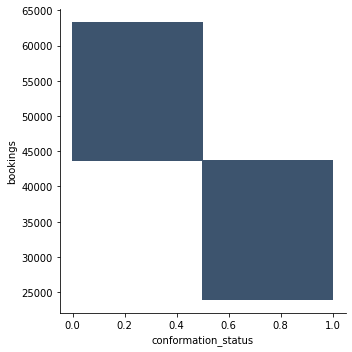

In [142]:
sns.displot(data=booking_info,x='conformation_status',y='bookings')

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

In [78]:
df_agent1 = new_df[['agent','is_canceled']]

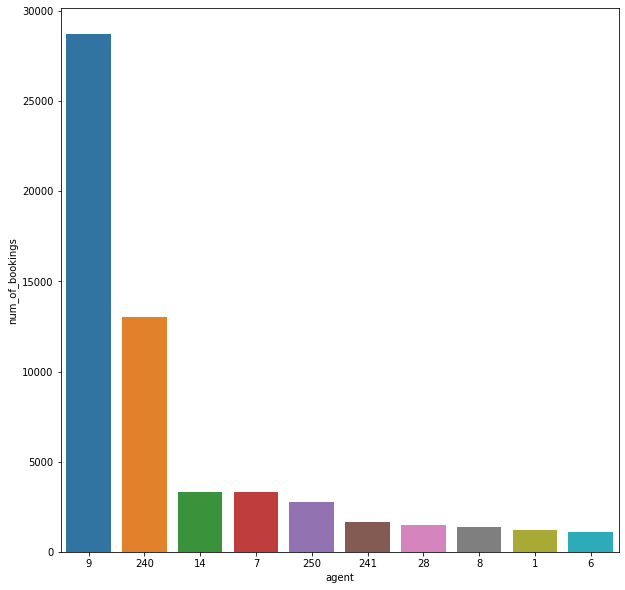

In [145]:
plt.figure(figsize = (10,10))
# Making agents data frame
df_agent = pd.DataFrame(new_df['agent'].value_counts())

# Reseting index
df_agent = df_agent.reset_index()

# Renaming the column
df_agent = df_agent.rename(columns = {'index':'agent','agent':'num_of_bookings'})

# Sorting by number of bookings
df_agent = df_agent.sort_values(by='num_of_bookings',ascending=False)

# removing rows where agent value 0
df_agent.drop(df_agent[df_agent['agent'] == 0].index, inplace = True)

# Taking top 10 agents
df_agent = df_agent[:10]

sns.barplot(x = 'agent', y = 'num_of_bookings', data = df_agent, order = df_agent.sort_values('num_of_bookings', ascending = False).agent)

From the above we can see most of the booking are from Agent with code 9 and 240 followed by 14 ,7, 250

In [88]:
df_agent1 = new_df[['agent','is_canceled']]
df_agent1.value_counts(df_agent1['is_canceled'] == 0)

is_canceled
True     63221
False    24009
dtype: int64